# 2025년 10월 6일~11일 기사 제목 워드클라우드

gdelt_articles_modified_0.csv에서 2025년 10월 6일부터 10월 11일까지 기사의 제목을 추출하여 워드클라우드를 생성합니다.

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

print("라이브러리 로드 완료")

라이브러리 로드 완료


## 1. 데이터 로드 및 필터링

In [2]:
# 데이터 로드
df = pd.read_csv('./data/processed/gdelt_articles_modified_0.csv', encoding='utf-8-sig')

print(f"전체 데이터: {len(df):,}행")
print(f"날짜 범위: {df['date'].min()} ~ {df['date'].max()}")
print(f"\n컬럼: {df.columns.tolist()}")

전체 데이터: 13,527행
날짜 범위: 20250901 ~ 20251031

컬럼: ['published_at_utc', 'date', 'title', 'url', 'domain', 'language', 'published_at_utc_dt']


In [3]:
# 2025년 10월 6일~11일 데이터 필터링
start_date = 20251006
end_date = 20251011
df_oct6_11 = df[(df['date'] >= start_date) & (df['date'] <= end_date)].copy()

print(f"\n{'='*60}")
print(f"2025년 10월 6일~11일 기사 데이터")
print(f"{'='*60}")
print(f"기사 수: {len(df_oct6_11):,}개")
print(f"\n샘플 기사 제목:")
for i, title in enumerate(df_oct6_11['title'].head(10), 1):
    print(f"{i:2d}. {title}")


2025년 10월 6일~11일 기사 데이터
기사 수: 1,486개

샘플 기사 제목:
 1. How high can BTC go ?
 2. Behind Bitcoin $125K Rally - Untold Stories Of Institutional Appetite And Supply Starvation
 3. Bitcoin Pioneer Who Bought At $20 Predicts BTC Will Reach $1 Million
 4. A Breakout To New Highs ? Bitcoin Bullish Wave Eyes $130k As RSI Stays Firm
 5. Strategy Rewrites Corporate Playbook With $3 . 9B Bitcoin Gain MSTR To Break Out ? - Strategy ( NASDAQ : MSTR )
 6. Digital Asset Investments Pull $6B as BTC Inflows Set New Records
 7. Second Largest Bitcoin ETF Inflows in History Hint at $130K as Bitcoin Hyper Raises $21 . 6M
 8. Bitcoin Rekor Kırdı !
 9. Bitcoin rekor kırdı : Fiyat 125 . 000 Doları aştı !
10. Strategy Made $3 . 9 Billion In Bitcoin Gains Last Quarter


## 2. 텍스트 전처리

In [4]:
# 모든 제목을 하나의 문자열로 결합
all_titles = ' '.join(df_oct6_11['title'].dropna().astype(str))

print(f"전체 텍스트 길이: {len(all_titles):,}자")
print(f"\n전체 텍스트 샘플 (처음 500자):")
print(all_titles[:500])

전체 텍스트 길이: 106,408자

전체 텍스트 샘플 (처음 500자):
How high can BTC go ? Behind Bitcoin $125K Rally - Untold Stories Of Institutional Appetite And Supply Starvation Bitcoin Pioneer Who Bought At $20 Predicts BTC Will Reach $1 Million A Breakout To New Highs ? Bitcoin Bullish Wave Eyes $130k As RSI Stays Firm Strategy Rewrites Corporate Playbook With $3 . 9B Bitcoin Gain MSTR To Break Out ? - Strategy ( NASDAQ : MSTR ) Digital Asset Investments Pull $6B as BTC Inflows Set New Records Second Largest Bitcoin ETF Inflows in History Hint at $130K as 


In [5]:
# 단어 추출 및 정제
# 영문 단어만 추출 (최소 3글자 이상)
words = re.findall(r'\b[a-zA-Z]{3,}\b', all_titles.lower())

# 불용어 리스트 (일반적인 영어 불용어)
stopwords = {
    'the', 'and', 'for', 'are', 'but', 'not', 'you', 'all', 'can', 'was',
    'one', 'our', 'out', 'has', 'how', 'its', 'let', 'put', 'say', 'she',
    'too', 'use', 'will', 'about', 'after', 'that', 'with', 'from', 'have',
    'this', 'they', 'what', 'been', 'more', 'when', 'your', 'than', 'into',
    'could', 'other', 'some', 'would', 'make', 'like', 'just', 'know',
    'take', 'over', 'such', 'well', 'even', 'most', 'also', 'before',
    'between', 'both', 'each', 'few', 'may', 'should', 'where',
    'is', 'are', 'was', 'were', 'be', 'being', 'been',
    'do', 'does', 'did', 'doing', 'have', 'has', 'had', 'having',
    'news', 'report', 'reports', 'reported',
    'analysis', 'analyst', 'analysts',
    'says', 'said', 'according',
    'amid', 'after', 'before',
    'update', 'updates', 'latest',
    'today', 'yesterday',
    'time', 'year', 'years', 'week', 'weeks',
    'day', 'days', 'month', 'months',
    'people', 'investors', 'traders',
    'good', 'bad', 'new', 'old',
    'much', 'many', 'high', 'low',
    'million', 'billion',
    'hit', 'hits', 'rise', 'rises',
    'fall', 'falls', 'surge', 'surges',
    'drop', 'drops',
    'bitcoin', 'btc', 'crypto', 'cryptocurrency',
    'price', 'prices',
    'market', 'markets',
    'stock', 'stocks',
    'ethereum', 'xrp',
    'gold',
    'etf', 'etfs',
    'mining',
    'record',
    'rally',
    'shutdown',
    'why',
    'here'
}



# 불용어 제거
filtered_words = [word for word in words if word not in stopwords]

print(f"\n추출된 단어 수 (불용어 제거 전): {len(words):,}개")
print(f"추출된 단어 수 (불용어 제거 후): {len(filtered_words):,}개")
print(f"고유 단어 수: {len(set(filtered_words)):,}개")


추출된 단어 수 (불용어 제거 전): 10,820개
추출된 단어 수 (불용어 제거 후): 7,471개
고유 단어 수: 3,116개


In [6]:
# 단어 빈도 계산
word_counts = Counter(filtered_words)

print(f"\n{'='*60}")
print("상위 30개 단어")
print(f"{'='*60}")
for i, (word, count) in enumerate(word_counts.most_common(30), 1):
    print(f"{i:2d}. {word:20s} : {count:3d}회")


상위 30개 단어
 1. trump                :  68회
 2. highs                :  36회
 3. eth                  :  35회
 4. dogecoin             :  31회
 5. china                :  31회
 6. digital              :  30회
 7. global               :  28회
 8. trade                :  27회
 9. now                  :  24회
10. buy                  :  23회
11. treasury             :  23회
12. wall                 :  22회
13. kripto               :  22회
14. inflows              :  21회
15. next                 :  21회
16. dollar               :  21회
17. top                  :  21회
18. street               :  21회
19. strategy             :  20회
20. best                 :  20회
21. first                :  20회
22. nasdaq               :  18회
23. grayscale            :  18회
24. sol                  :  18회
25. data                 :  17회
26. bin                  :  17회
27. launches             :  17회
28. wealth               :  17회
29. breakout             :  16회
30. solana               :  16회


## 3. 워드클라우드 생성

✓ 워드클라우드 저장: ./data/analysis_results/wordcloud_20251006_20251011.png


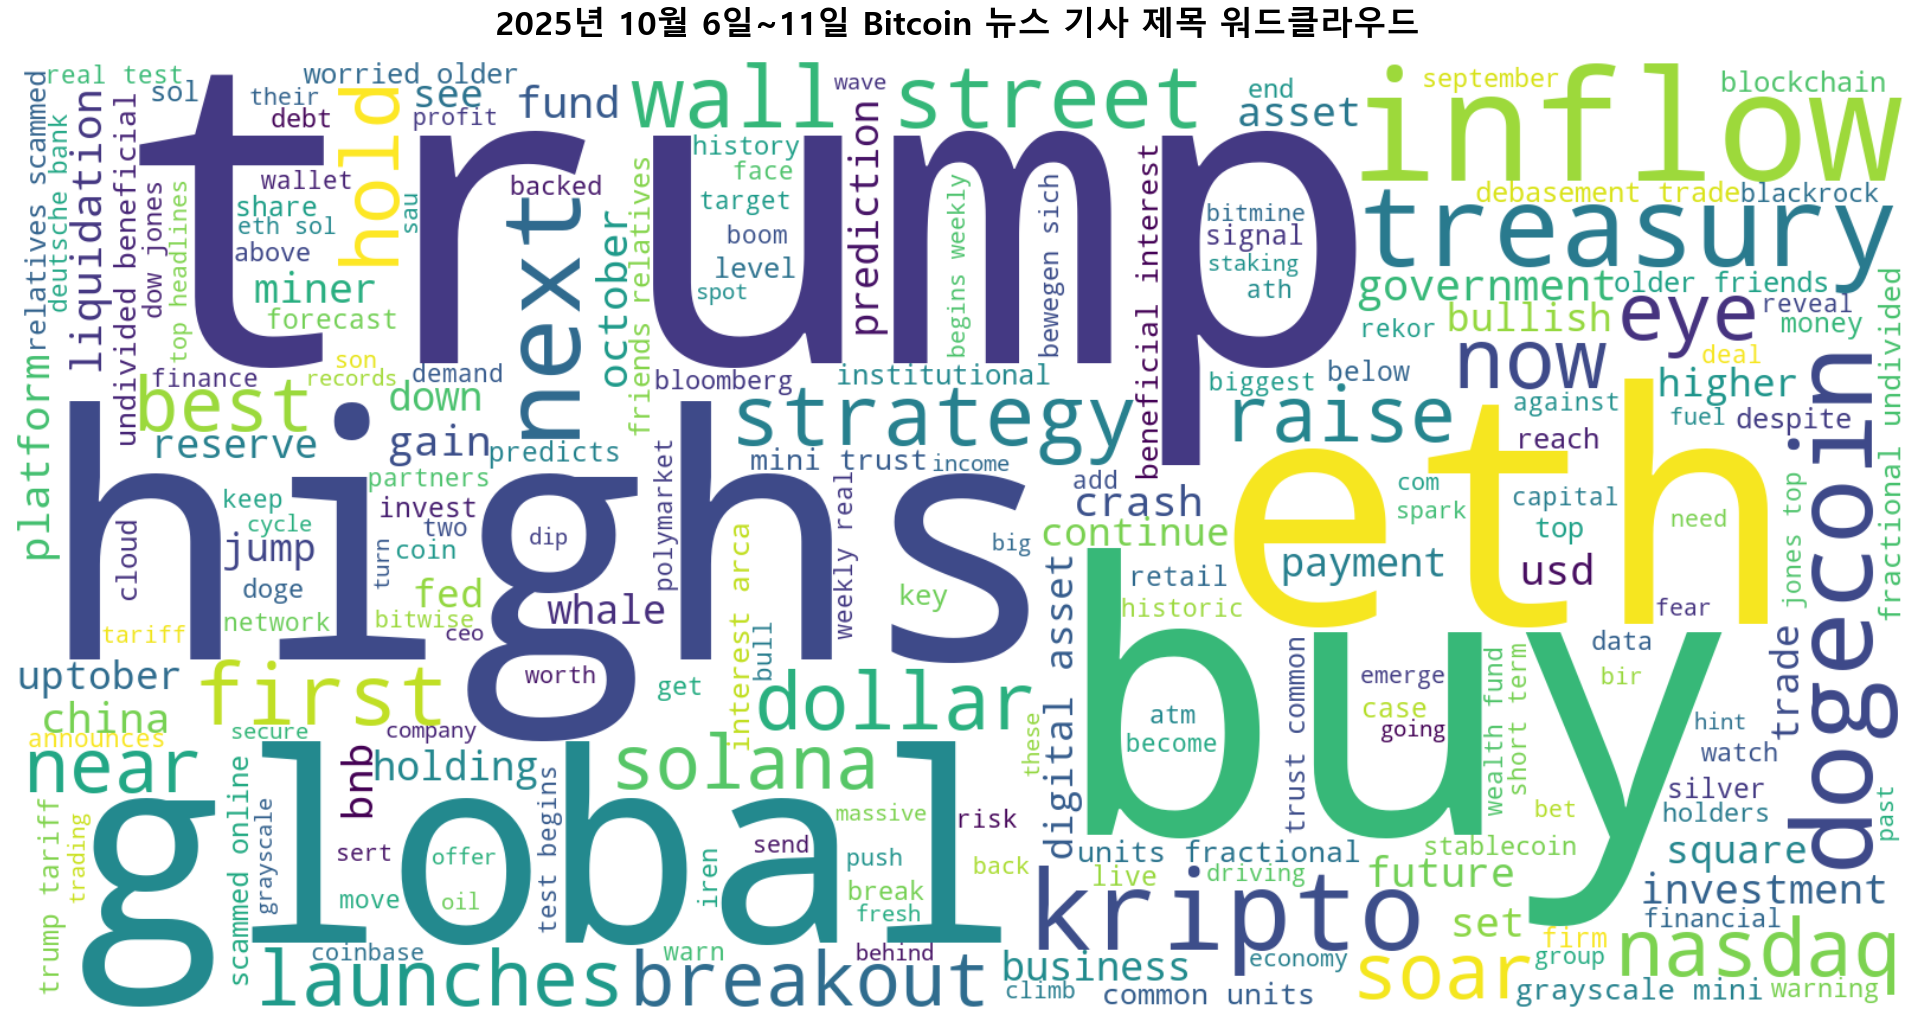

In [7]:
# 워드클라우드 생성
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis',
    relative_scaling=0.5,
    min_font_size=10,
    max_words=200,
    stopwords=stopwords
).generate(' '.join(filtered_words))

# 워드클라우드 시각화
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('2025년 10월 6일~11일 Bitcoin 뉴스 기사 제목 워드클라우드', 
          fontsize=24, fontweight='bold', pad=20)
plt.tight_layout(pad=0)

# 이미지 저장
output_path = './data/analysis_results/wordcloud_20251006_20251011.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ 워드클라우드 저장: {output_path}")

plt.show()

## 4. 추가 분석: 단어 빈도 막대 그래프

✓ 단어 빈도 그래프 저장: ./data/analysis_results/word_frequency_20251006_20251011.png


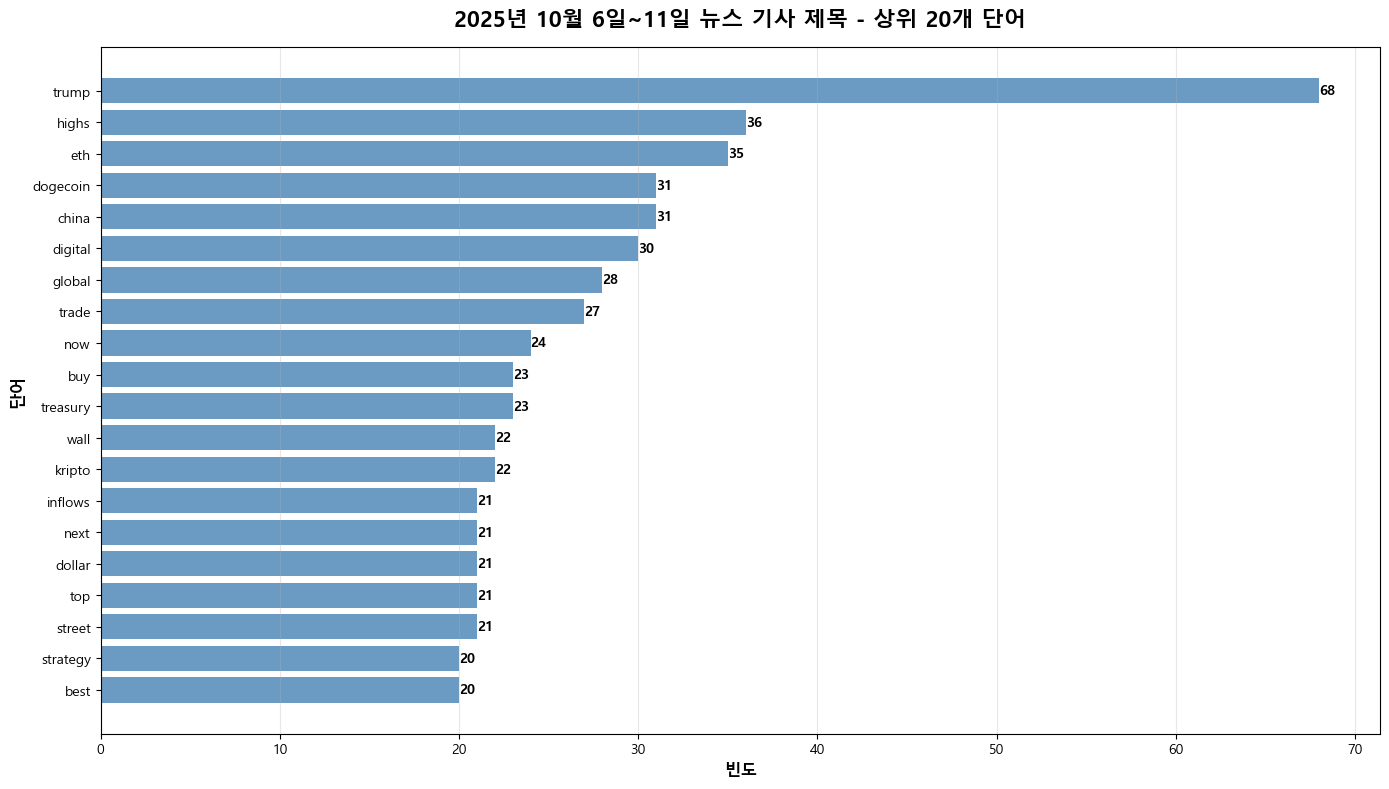

In [8]:
# 상위 20개 단어 시각화
top_20 = word_counts.most_common(20)
words_top20 = [word for word, count in top_20]
counts_top20 = [count for word, count in top_20]

plt.figure(figsize=(14, 8))
bars = plt.barh(words_top20, counts_top20, color='steelblue', alpha=0.8)

# 막대에 값 표시
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', 
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.xlabel('빈도', fontsize=12, fontweight='bold')
plt.ylabel('단어', fontsize=12, fontweight='bold')
plt.title('2025년 10월 6일~11일 뉴스 기사 제목 - 상위 20개 단어', 
          fontsize=16, fontweight='bold', pad=15)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

# 그래프 저장
bar_output_path = './data/analysis_results/word_frequency_20251006_20251011.png'
plt.savefig(bar_output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ 단어 빈도 그래프 저장: {bar_output_path}")

plt.show()

## 5. 단어 빈도 데이터 저장

In [ ]:
# 단어 빈도를 DataFrame으로 변환하여 저장
word_freq_df = pd.DataFrame(word_counts.most_common(), columns=['word', 'frequency'])

csv_output_path = './data/analysis_results/word_frequency_20251006_20251011.csv'
word_freq_df.to_csv(csv_output_path, index=False, encoding='utf-8-sig')

print(f"\n{'='*60}")
print("결과 요약")
print(f"{'='*60}")
print(f"✓ 분석 대상: 2025년 10월 6일~11일 기사 {len(df_oct6_11):,}개")
print(f"✓ 추출된 단어: {len(filtered_words):,}개")
print(f"✓ 고유 단어: {len(set(filtered_words)):,}개")
print(f"\n저장된 파일:")
print(f"  1. {output_path}")
print(f"  2. {bar_output_path}")
print(f"  3. {csv_output_path}")
print(f"\n✓ 모든 작업 완료!")

# 최종 데이터 확인
print(f"\n[단어 빈도 데이터 샘플]")
display(word_freq_df.head(20))